In [27]:
%store -r stats_downwind stats_circle stats_upwind

In [28]:
import xarray as xr
import numpy as np


## Compute cell development stages

## Upwind

In [29]:
# Load the NetCDF data
data_upwind = stats_upwind

# Classification function
def classify_cell_stages_advanced(data):
    cell_area = data['cell_area'].values
    max_dbz = data['max_dbz'].values
    maxETH_20dbz = data['maxETH_20dbz'].values

    stages = np.full(cell_area.shape, 'Unknown', dtype=object)  # Initialize stages array

    for i in range(cell_area.shape[0]):  # Iterate over tracks
        current_stage = 'Unknown'
        for j in range(1, cell_area.shape[1]):  # Iterate over times
            if np.isnan(cell_area[i, j]) or np.isnan(max_dbz[i, j]) or np.isnan(maxETH_20dbz[i, j]):
                continue

            is_developing = (cell_area[i, j] > cell_area[i, j-1] and 
                             max_dbz[i, j] > max_dbz[i, j-1] and 
                             maxETH_20dbz[i, j] > maxETH_20dbz[i, j-1])

            is_mature = (current_stage == 'Developing' and 
                         cell_area[i, j] >= cell_area[i, j-1] and 
                         max_dbz[i, j] >= max_dbz[i, j-1])

            is_dissipating = (current_stage == 'Mature' and 
                              cell_area[i, j] < cell_area[i, j-1] and 
                              max_dbz[i, j] < max_dbz[i, j-1] and 
                              maxETH_20dbz[i, j] < maxETH_20dbz[i, j-1])

            if is_developing:
                current_stage = 'Developing'
            elif is_mature:
                current_stage = 'Mature'
            elif is_dissipating:
                current_stage = 'Dissipating'

            stages[i, j] = current_stage

    return stages

# Apply the classification function
advanced_cell_stages = classify_cell_stages_advanced(data_upwind)

# Function to extract cell areas for each stage
def get_cell_areas_by_stage(data, stages):
    cell_areas = data['cell_area'].values
    developing_areas = cell_areas[stages == 'Developing']
    mature_areas = cell_areas[stages == 'Mature']
    dissipating_areas = cell_areas[stages == 'Dissipating']

    return developing_areas, mature_areas, dissipating_areas

# Function to extract echo top heights for each stage
def get_eth_by_stage(data, stages):
    eth = data['maxETH_20dbz'].values
    developing_eth = eth[stages == 'Developing']
    mature_eth = eth[stages == 'Mature']
    dissipating_eth = eth[stages == 'Dissipating']

    return developing_eth, mature_eth, dissipating_eth

# Function to extract echo top heights for each stage
def get_dbz_by_stage(data, stages):
    dbz = data['max_dbz'].values
    developing_dbz = dbz[stages == 'Developing']
    mature_dbz = dbz[stages == 'Mature']
    dissipating_dbz = dbz[stages == 'Dissipating']

    return developing_dbz, mature_dbz, dissipating_dbz

# Extract cell variables for each stage
developing_areas, mature_areas, dissipating_areas = get_cell_areas_by_stage(data_upwind, advanced_cell_stages)   # Cell area
developing_eth, mature_eth, dissipating_eth = get_eth_by_stage(data_upwind, advanced_cell_stages)   # Echo top height
developing_dbz, mature_dbz, dissipating_dbz = get_dbz_by_stage(data_upwind, advanced_cell_stages)   # Reflectivity

upwind_cell_areas_bin = [developing_areas, mature_areas, dissipating_areas]
upwind_eth_bin = [developing_eth, mature_eth, dissipating_eth]
upwind_dbz_bin = [developing_dbz, mature_dbz, dissipating_dbz]

## Urban

In [30]:
# Load the NetCDF data
data_urban = stats_circle

# Classification function
def classify_cell_stages_advanced(data):
    cell_area = data['cell_area'].values
    max_dbz = data['max_dbz'].values
    maxETH_20dbz = data['maxETH_20dbz'].values

    stages = np.full(cell_area.shape, 'Unknown', dtype=object)  # Initialize stages array

    for i in range(cell_area.shape[0]):  # Iterate over tracks
        current_stage = 'Unknown'
        for j in range(1, cell_area.shape[1]):  # Iterate over times
            if np.isnan(cell_area[i, j]) or np.isnan(max_dbz[i, j]) or np.isnan(maxETH_20dbz[i, j]):
                continue

            is_developing = (cell_area[i, j] > cell_area[i, j-1] and 
                             max_dbz[i, j] > max_dbz[i, j-1] and 
                             maxETH_20dbz[i, j] > maxETH_20dbz[i, j-1])

            is_mature = (current_stage == 'Developing' and 
                         cell_area[i, j] >= cell_area[i, j-1] and 
                         max_dbz[i, j] >= max_dbz[i, j-1])

            is_dissipating = (current_stage == 'Mature' and 
                              cell_area[i, j] < cell_area[i, j-1] and 
                              max_dbz[i, j] < max_dbz[i, j-1] and 
                              maxETH_20dbz[i, j] < maxETH_20dbz[i, j-1])

            if is_developing:
                current_stage = 'Developing'
            elif is_mature:
                current_stage = 'Mature'
            elif is_dissipating:
                current_stage = 'Dissipating'

            stages[i, j] = current_stage

    return stages

# Apply the classification function
advanced_cell_stages = classify_cell_stages_advanced(data_urban)

# Function to extract cell areas for each stage
def get_cell_areas_by_stage(data, stages):
    cell_areas = data['cell_area'].values
    developing_areas = cell_areas[stages == 'Developing']
    mature_areas = cell_areas[stages == 'Mature']
    dissipating_areas = cell_areas[stages == 'Dissipating']

    return developing_areas, mature_areas, dissipating_areas

# Function to extract echo top heights for each stage
def get_eth_by_stage(data, stages):
    eth = data['maxETH_20dbz'].values
    developing_eth = eth[stages == 'Developing']
    mature_eth = eth[stages == 'Mature']
    dissipating_eth = eth[stages == 'Dissipating']

    return developing_eth, mature_eth, dissipating_eth

# Function to extract echo top heights for each stage
def get_dbz_by_stage(data, stages):
    dbz = data['max_dbz'].values
    developing_dbz = dbz[stages == 'Developing']
    mature_dbz = dbz[stages == 'Mature']
    dissipating_dbz = dbz[stages == 'Dissipating']

    return developing_dbz, mature_dbz, dissipating_dbz

# Extract cell variables for each stage
developing_areas, mature_areas, dissipating_areas = get_cell_areas_by_stage(data_urban, advanced_cell_stages)   # Cell area
developing_eth, mature_eth, dissipating_eth = get_eth_by_stage(data_urban, advanced_cell_stages)   # Echo top height
developing_dbz, mature_dbz, dissipating_dbz = get_dbz_by_stage(data_urban, advanced_cell_stages)   # Reflectivity

urban_cell_areas_bin = [developing_areas, mature_areas, dissipating_areas]
urban_eth_bin = [developing_eth, mature_eth, dissipating_eth]
urban_dbz_bin = [developing_dbz, mature_dbz, dissipating_dbz]

## Downwind

In [31]:
import xarray as xr
import numpy as np

# Load the NetCDF data
data_downwind = stats_downwind

# Classification function
def classify_cell_stages_advanced(data):
    cell_area = data['cell_area'].values
    max_dbz = data['max_dbz'].values
    maxETH_20dbz = data['maxETH_20dbz'].values

    stages = np.full(cell_area.shape, 'Unknown', dtype=object)  # Initialize stages array

    for i in range(cell_area.shape[0]):  # Iterate over tracks
        current_stage = 'Unknown'
        for j in range(1, cell_area.shape[1]):  # Iterate over times
            if np.isnan(cell_area[i, j]) or np.isnan(max_dbz[i, j]) or np.isnan(maxETH_20dbz[i, j]):
                continue

            is_developing = (cell_area[i, j] > cell_area[i, j-1] and 
                             max_dbz[i, j] > max_dbz[i, j-1] and 
                             maxETH_20dbz[i, j] > maxETH_20dbz[i, j-1])

            is_mature = (current_stage == 'Developing' and 
                         cell_area[i, j] >= cell_area[i, j-1] and 
                         max_dbz[i, j] >= max_dbz[i, j-1])

            is_dissipating = (current_stage == 'Mature' and 
                              cell_area[i, j] < cell_area[i, j-1] and 
                              max_dbz[i, j] < max_dbz[i, j-1] and 
                              maxETH_20dbz[i, j] < maxETH_20dbz[i, j-1])

            if is_developing:
                current_stage = 'Developing'
            elif is_mature:
                current_stage = 'Mature'
            elif is_dissipating:
                current_stage = 'Dissipating'

            stages[i, j] = current_stage

    return stages

# Apply the classification function
advanced_cell_stages = classify_cell_stages_advanced(data_downwind)

# Function to extract cell areas for each stage
def get_cell_areas_by_stage(data, stages):
    cell_areas = data['cell_area'].values
    developing_areas = cell_areas[stages == 'Developing']
    mature_areas = cell_areas[stages == 'Mature']
    dissipating_areas = cell_areas[stages == 'Dissipating']

    return developing_areas, mature_areas, dissipating_areas

# Function to extract echo top heights for each stage
def get_eth_by_stage(data, stages):
    eth = data['maxETH_20dbz'].values
    developing_eth = eth[stages == 'Developing']
    mature_eth = eth[stages == 'Mature']
    dissipating_eth = eth[stages == 'Dissipating']

    return developing_eth, mature_eth, dissipating_eth

# Function to extract echo top heights for each stage
def get_dbz_by_stage(data, stages):
    dbz = data['max_dbz'].values
    developing_dbz = dbz[stages == 'Developing']
    mature_dbz = dbz[stages == 'Mature']
    dissipating_dbz = dbz[stages == 'Dissipating']

    return developing_dbz, mature_dbz, dissipating_dbz

# Extract cell variables for each stage
developing_areas, mature_areas, dissipating_areas = get_cell_areas_by_stage(data_downwind, advanced_cell_stages)   # Cell area
developing_eth, mature_eth, dissipating_eth = get_eth_by_stage(data_downwind, advanced_cell_stages)   # Echo top height
developing_dbz, mature_dbz, dissipating_dbz = get_dbz_by_stage(data_downwind, advanced_cell_stages)   # Reflectivity

downwind_cell_areas_bin = [developing_areas, mature_areas, dissipating_areas]
downwind_eth_bin = [developing_eth, mature_eth, dissipating_eth]
downwind_dbz_bin = [developing_dbz, mature_dbz, dissipating_dbz]

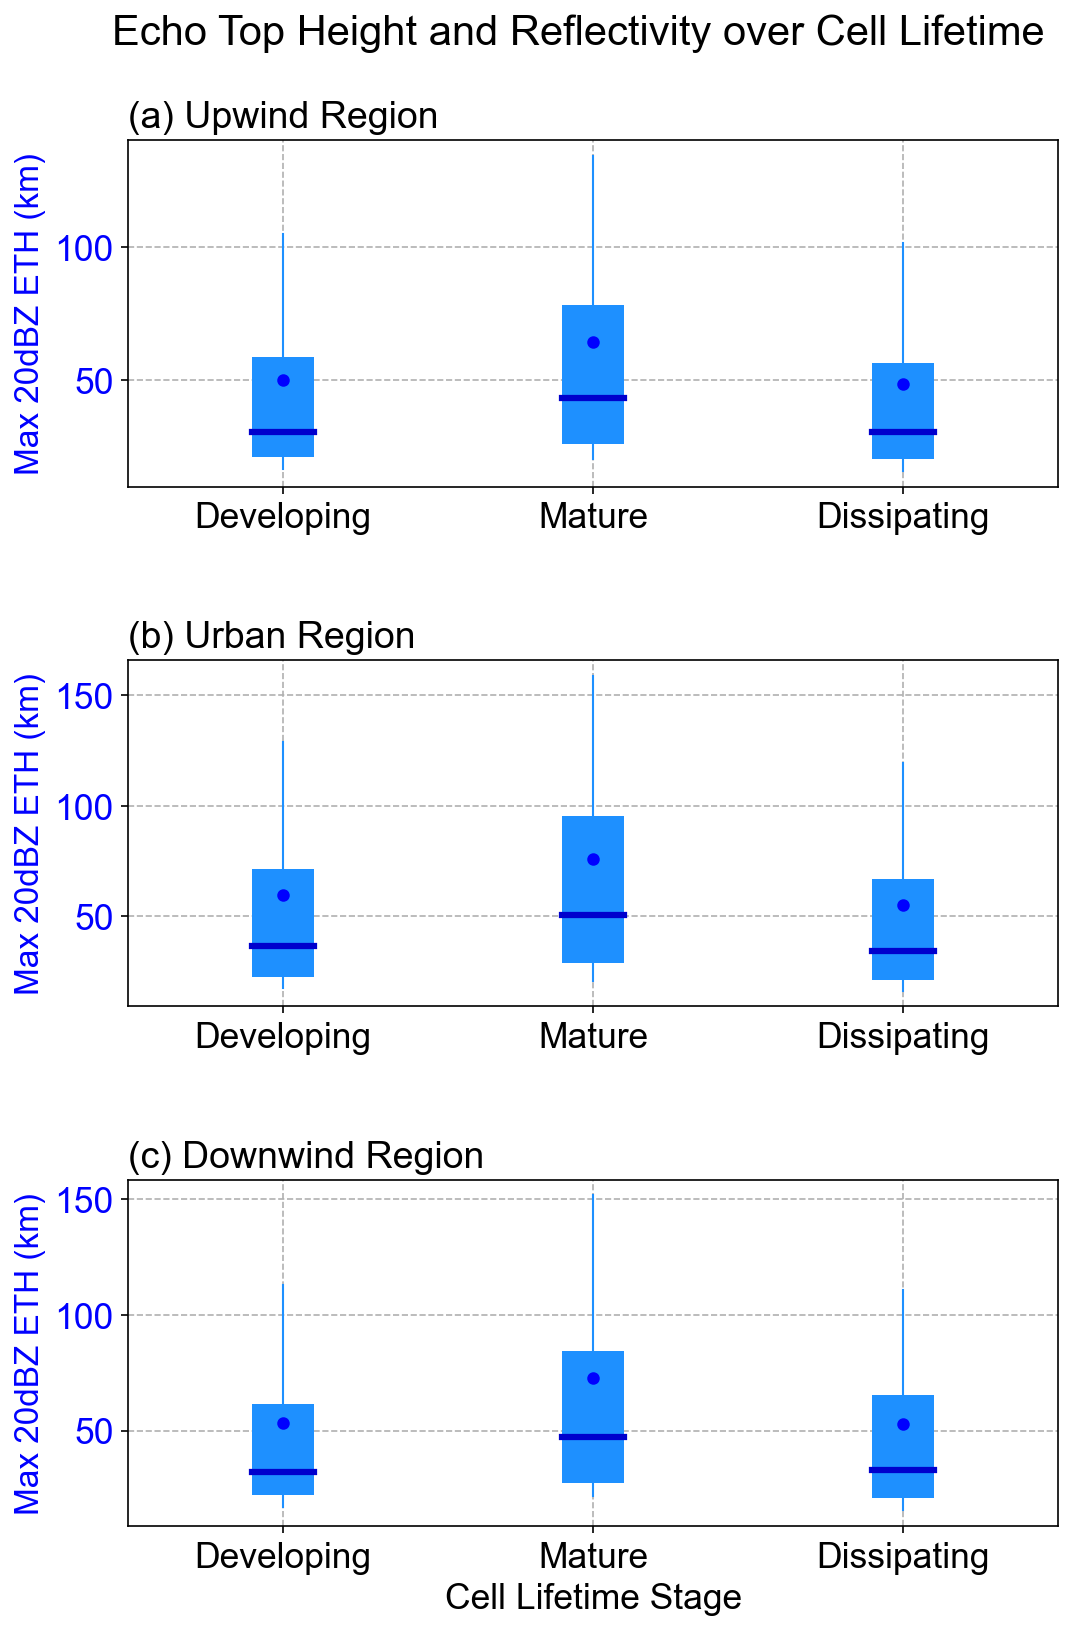

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Setting up matplotlib parameters
mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.facecolor'] = 'white'

# Creating a 3x1 subplot layout
fig, axes = plt.subplots(3, 1, figsize=[8, 12], dpi=150)
fig.subplots_adjust(hspace=0.5)

# Common boxplot properties
boxprops_ = dict(linestyle='-', linewidth=0, color='k', facecolor='dodgerblue', alpha=1)
medianprops_ = dict(linestyle='-', linewidth=3, color='mediumblue')
meanpointprops_ = dict(marker='o', markeredgecolor='b', markerfacecolor='b', markersize=5)
whiskerprops_ = dict(linewidth=1, linestyle='-', color='dodgerblue')

# Main title for the figure
fig.suptitle('Echo Top Height and Reflectivity over Cell Lifetime', fontsize=20, y=0.95)

# Bin labels (assuming these are common for all subplots)
bin_labels = ['Developing', 'Mature', 'Dissipating']

# First subplot (Upwind Cells)
ax1 = axes[0]
# Boxplot on the left y-axis
ax1.boxplot(upwind_cell_areas_bin, positions=[1, 2, 3], patch_artist=True, widths=0.2, notch=False, manage_ticks=False,
            boxprops=boxprops_, medianprops=medianprops_, whiskerprops=whiskerprops_, 
            showfliers=False, showmeans=True, meanprops=meanpointprops_, whis=[10,90], meanline=False, showcaps=False)
ax1.set_ylabel('Max 20dBZ ETH (km)', color='blue', fontsize=16)
ax1.set_xlim(0.5, 3.5)
#ax1.set_ylim(0, 22)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('(a) Upwind Region', loc='left', fontsize=18)
#ax1.set_xlabel('Cell Lifetime Stage')
ax1.grid(ls='--')
ax1.set_xticks([1, 2, 3])
ax1.set_xticklabels(bin_labels)

# Second subplot (Split Cells)
ax2 = axes[1]
# Boxplot on the left y-axis
ax2.boxplot(urban_cell_areas_bin, positions=[1,2,3], patch_artist=True, widths=0.2, notch=False, manage_ticks=False,
            boxprops=boxprops_, medianprops=medianprops_, whiskerprops=whiskerprops_, 
            showfliers=False, showmeans=True, meanprops=meanpointprops_, whis=[10,90], meanline=False, showcaps=False)
ax2.set_ylabel('Max 20dBZ ETH (km)', color='blue', fontsize=16)
ax2.set_xlim(0.5, 3.5)
#ax2.set_ylim(0, 22)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_title('(b) Urban Region', loc='left', fontsize=18)
#ax2.set_xlabel('Cell Lifetime Stage')
ax2.grid(ls='--')
ax2.set_xticks([1, 2, 3])
ax2.set_xticklabels(bin_labels)

# Third subplot (Non-upwind Cells)
ax3 = axes[2]
# Boxplot on the left y-axis
ax3.boxplot(downwind_cell_areas_bin, positions=[1,2,3], patch_artist=True, widths=0.2, notch=False, manage_ticks=False,
            boxprops=boxprops_, medianprops=medianprops_, whis=[10,90], whiskerprops=whiskerprops_, 
            showfliers=False, showmeans=True, meanprops=meanpointprops_, meanline=False, showcaps=False)
ax3.set_ylabel('Max 20dBZ ETH (km)', color='blue', fontsize=16)
ax3.set_xlim(0.5, 3.5)
#ax3.set_ylim(0, 22)
ax3.tick_params(axis='y', labelcolor='blue')
ax3.set_title('(c) Downwind Region', loc='left', fontsize=18)
ax3.set_xlabel('Cell Lifetime Stage')
ax3.grid(ls='--')
ax3.set_xticks([1, 2, 3])
ax3.set_xticklabels(bin_labels)

plt.show()


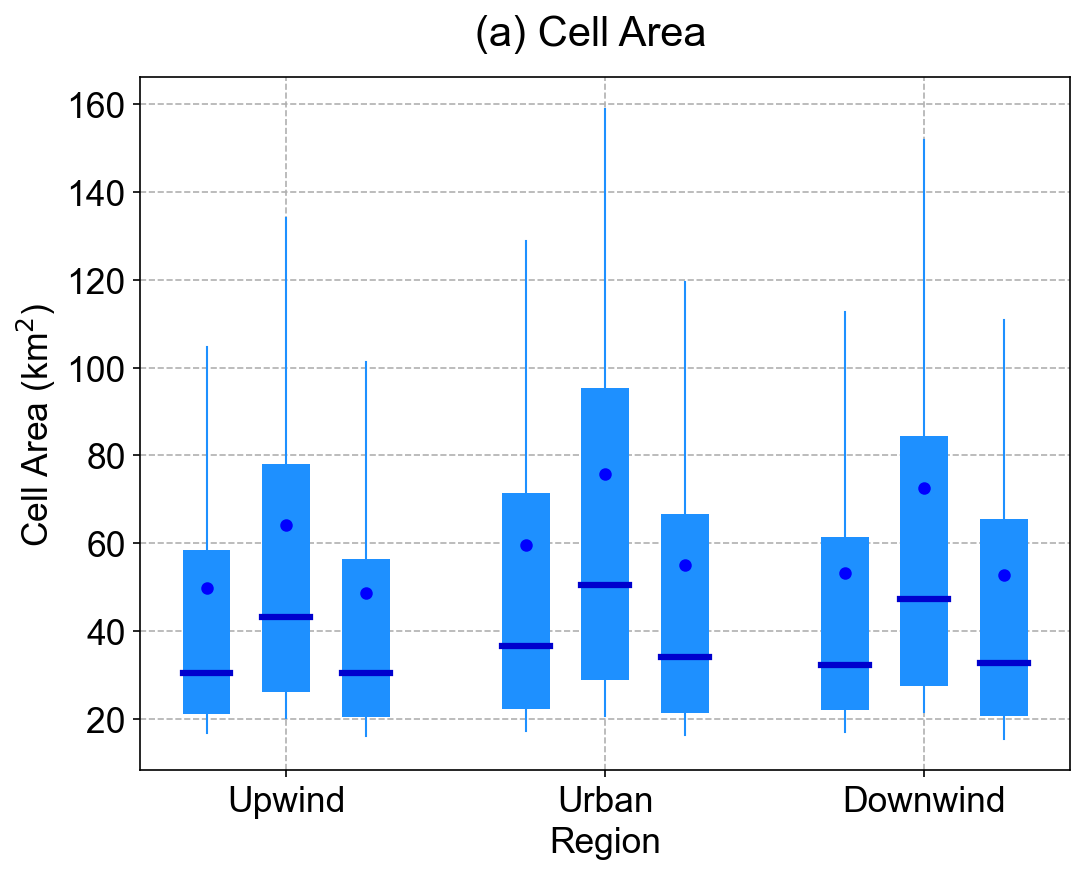

In [53]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Sample data (placeholders, replace with actual data)

# Setting up matplotlib parameters
mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.facecolor'] = 'white'

# Creating a single subplot layout
fig, ax = plt.subplots(figsize=[8, 6], dpi=150)

# Common boxplot properties
boxprops_ = dict(linestyle='-', linewidth=0, color='k', facecolor='dodgerblue', alpha=1)
medianprops_ = dict(linestyle='-', linewidth=3, color='mediumblue')
meanpointprops_ = dict(marker='o', markeredgecolor='b', markerfacecolor='b', markersize=5)
whiskerprops_ = dict(linewidth=1, linestyle='-', color='dodgerblue')

# Main title for the figure
fig.suptitle('(a) Cell Area', fontsize=20, y=0.95)

# Bin labels (assuming these are common for all subplots)
bin_labels = ['Developing', 'Mature', 'Dissipating']

# Plot settings
positions = [1, 2, 3, 5, 6, 7, 9, 10, 11]  # Position for each boxplot
widths = 0.6  # Width of each boxplot

# Combining data for plotting
combined_data = upwind_cell_areas_bin + urban_cell_areas_bin + downwind_cell_areas_bin

# Boxplot
ax.boxplot(combined_data, positions=positions, patch_artist=True, widths=widths, notch=False, manage_ticks=False,
           boxprops=boxprops_, medianprops=medianprops_, whiskerprops=whiskerprops_, 
           showfliers=False, showmeans=True, meanprops=meanpointprops_, whis=[10, 90], meanline=False, showcaps=False)

# Set labels and title
ax.set_ylabel('Cell Area (km$^2$)')
ax.set_xlabel('Region')
ax.set_xticks([2, 6, 10])
ax.set_xticklabels(['Upwind', 'Urban', 'Downwind'])
ax.grid(ls='--')

plt.show()



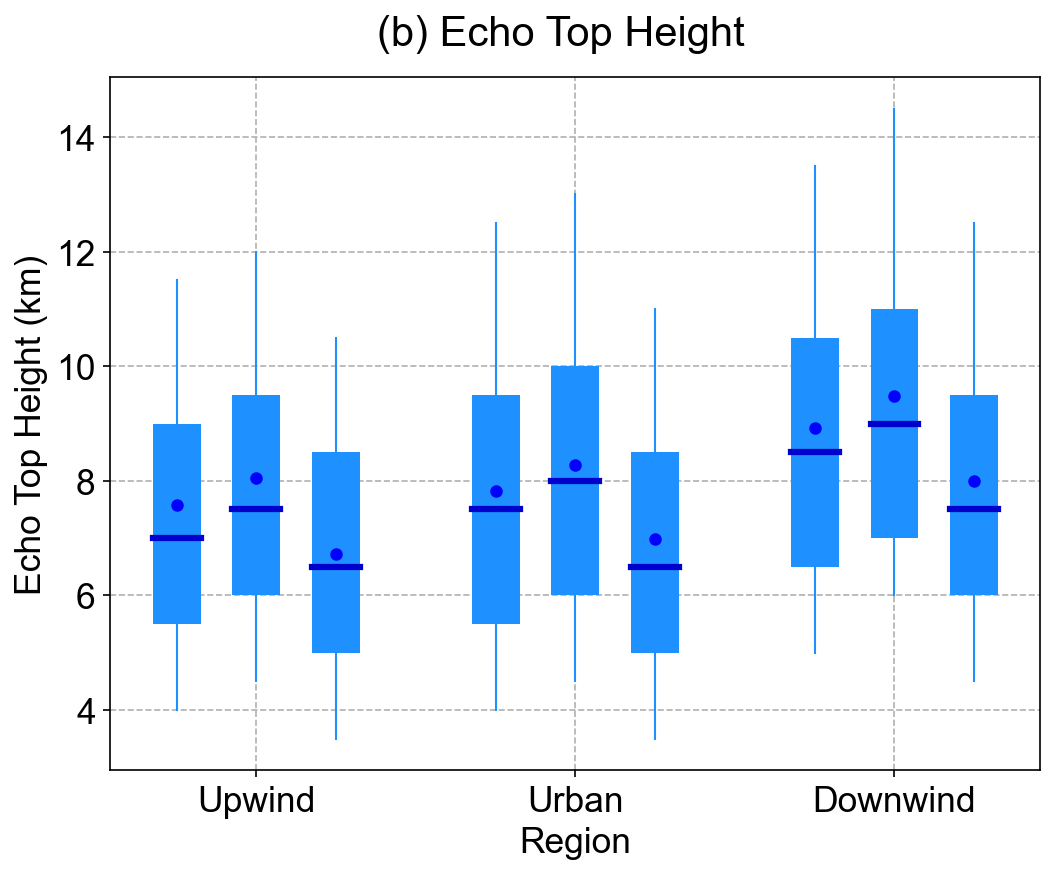

In [55]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Sample data (placeholders, replace with actual data)

# Setting up matplotlib parameters
mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.facecolor'] = 'white'

# Creating a single subplot layout
fig, ax = plt.subplots(figsize=[8, 6], dpi=150)

# Common boxplot properties
boxprops_ = dict(linestyle='-', linewidth=0, color='k', facecolor='dodgerblue', alpha=1)
medianprops_ = dict(linestyle='-', linewidth=3, color='mediumblue')
meanpointprops_ = dict(marker='o', markeredgecolor='b', markerfacecolor='b', markersize=5)
whiskerprops_ = dict(linewidth=1, linestyle='-', color='dodgerblue')

# Main title for the figure
fig.suptitle('(b) Echo Top Height', fontsize=20, y=0.95)

# Bin labels (assuming these are common for all subplots)
bin_labels = ['Developing', 'Mature', 'Dissipating']

# Plot settings
positions = [1, 2, 3, 5, 6, 7, 9, 10, 11]  # Position for each boxplot
widths = 0.6  # Width of each boxplot

# Combining data for plotting
combined_data = upwind_eth_bin + urban_eth_bin + downwind_eth_bin

# Boxplot
ax.boxplot(combined_data, positions=positions, patch_artist=True, widths=widths, notch=False, manage_ticks=False,
           boxprops=boxprops_, medianprops=medianprops_, whiskerprops=whiskerprops_, 
           showfliers=False, showmeans=True, meanprops=meanpointprops_, whis=[10, 90], meanline=False, showcaps=False)

# Set labels and title
ax.set_ylabel('Echo Top Height (km)')
ax.set_xlabel('Region')
ax.set_xticks([2, 6, 10])
ax.set_xticklabels(['Upwind', 'Urban', 'Downwind'])
ax.grid(ls='--')

plt.show()



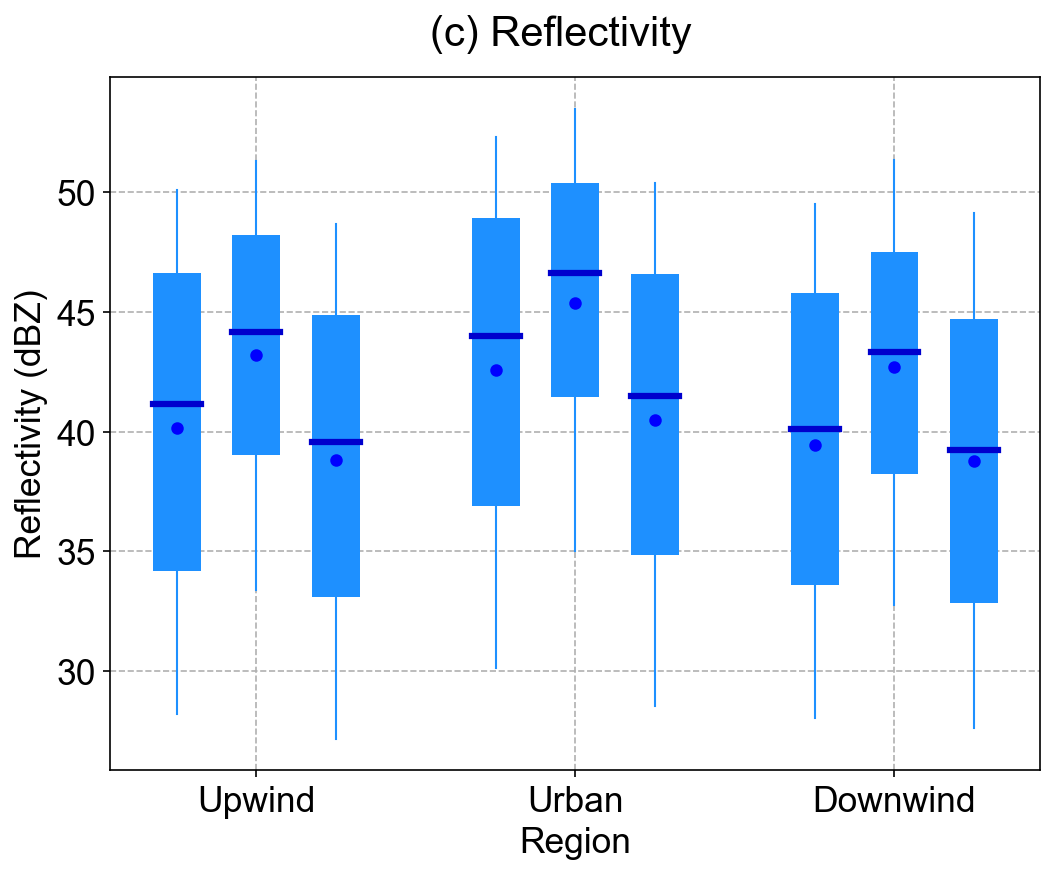

In [58]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Sample data (placeholders, replace with actual data)

# Setting up matplotlib parameters
mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.facecolor'] = 'white'

# Creating a single subplot layout
fig, ax = plt.subplots(figsize=[8, 6], dpi=150)

# Common boxplot properties
boxprops_ = dict(linestyle='-', linewidth=0, color='k', facecolor='dodgerblue', alpha=1)
medianprops_ = dict(linestyle='-', linewidth=3, color='mediumblue')
meanpointprops_ = dict(marker='o', markeredgecolor='b', markerfacecolor='b', markersize=5)
whiskerprops_ = dict(linewidth=1, linestyle='-', color='dodgerblue')

# Main title for the figure
fig.suptitle('(c) Reflectivity', fontsize=20, y=0.95)

# Bin labels (assuming these are common for all subplots)
bin_labels = ['Developing', 'Mature', 'Dissipating']

# Plot settings
positions = [1, 2, 3, 5, 6, 7, 9, 10, 11]  # Position for each boxplot
widths = 0.6  # Width of each boxplot

# Combining data for plotting
combined_data = upwind_dbz_bin + urban_dbz_bin + downwind_dbz_bin

# Boxplot
ax.boxplot(combined_data, positions=positions, patch_artist=True, widths=widths, notch=False, manage_ticks=False,
           boxprops=boxprops_, medianprops=medianprops_, whiskerprops=whiskerprops_, 
           showfliers=False, showmeans=True, meanprops=meanpointprops_, whis=[10, 90], meanline=False, showcaps=False)

# Set labels and title
ax.set_ylabel('Reflectivity (dBZ)')
ax.set_xlabel('Region')
ax.set_xticks([2, 6, 10])
ax.set_xticklabels(['Upwind', 'Urban', 'Downwind'])
ax.grid(ls='--')

plt.show()

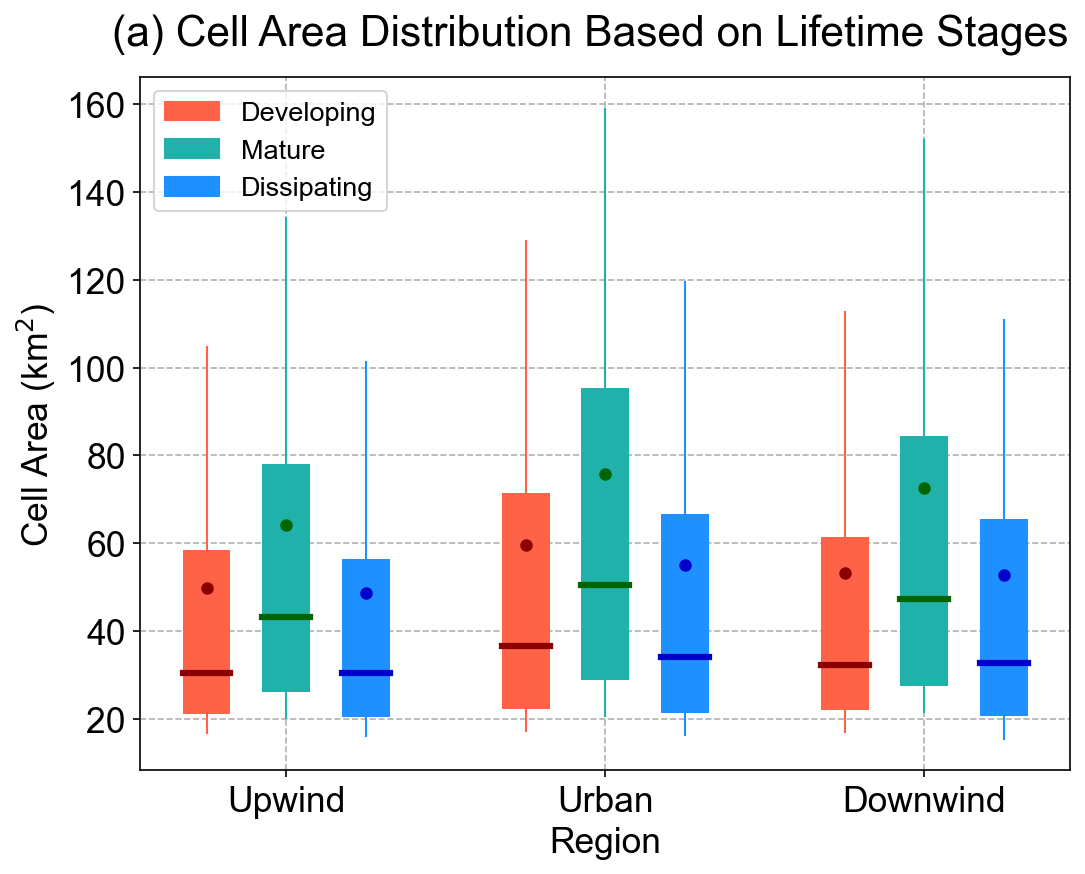

In [82]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

# Sample data (placeholders, replace with actual data)

# Setting up matplotlib parameters
mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.facecolor'] = 'white'

# Creating a single subplot layout
fig, ax = plt.subplots(figsize=[8, 6], dpi=150)

# Main title for the figure
fig.suptitle('(a) Cell Area Distribution Based on Lifetime Stages', y=0.95)

# Plot settings
positions = [1, 2, 3, 5, 6, 7, 9, 10, 11]  # Position for each boxplot
widths = 0.6  # Width of each boxplot

# Colors for the subplots
subplot_colors = ['darkred', 'darkgreen', 'mediumblue']
box_whisker_colors = ['tomato', 'lightseagreen', 'dodgerblue']
subplot_labels = ['Developing', 'Mature', 'Dissipating']  # Labels for the legend

# Combining data for plotting
combined_data = [upwind_cell_areas_bin, urban_cell_areas_bin, downwind_cell_areas_bin]

# Creating legend patches
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(box_whisker_colors, subplot_labels)]

# Creating boxplots with lighter colors
for i, data_group in enumerate(combined_data):
    for j, data in enumerate(data_group):
        color = subplot_colors[j]
        colors = box_whisker_colors[j]
        boxprops_ = dict(linestyle='-', linewidth=0, color='k', facecolor=colors)  # Lighter color
        medianprops_ = dict(linestyle='-', linewidth=3, color=color)
        meanpointprops_ = dict(marker='o', markeredgecolor=color, markerfacecolor=color, markersize=5)
        whiskerprops_ = dict(linewidth=1, linestyle='-', color=colors)  # Lighter color

        ax.boxplot(data, positions=[positions[i * 3 + j]], patch_artist=True, widths=widths, notch=False, manage_ticks=False,
                   boxprops=boxprops_, medianprops=medianprops_, whiskerprops=whiskerprops_,
                   showfliers=False, showmeans=True, meanprops=meanpointprops_, whis=[10, 90], meanline=False, showcaps=False)

# Set labels and title
ax.set_ylabel('Cell Area (km$^2$)')
ax.set_xlabel('Region')
ax.set_xticks([2, 6, 10])
ax.set_xticklabels(['Upwind', 'Urban', 'Downwind'])
ax.grid(ls='--')

# Adding legend
ax.legend(handles=legend_patches, loc=2, fontsize=13)

plt.show()


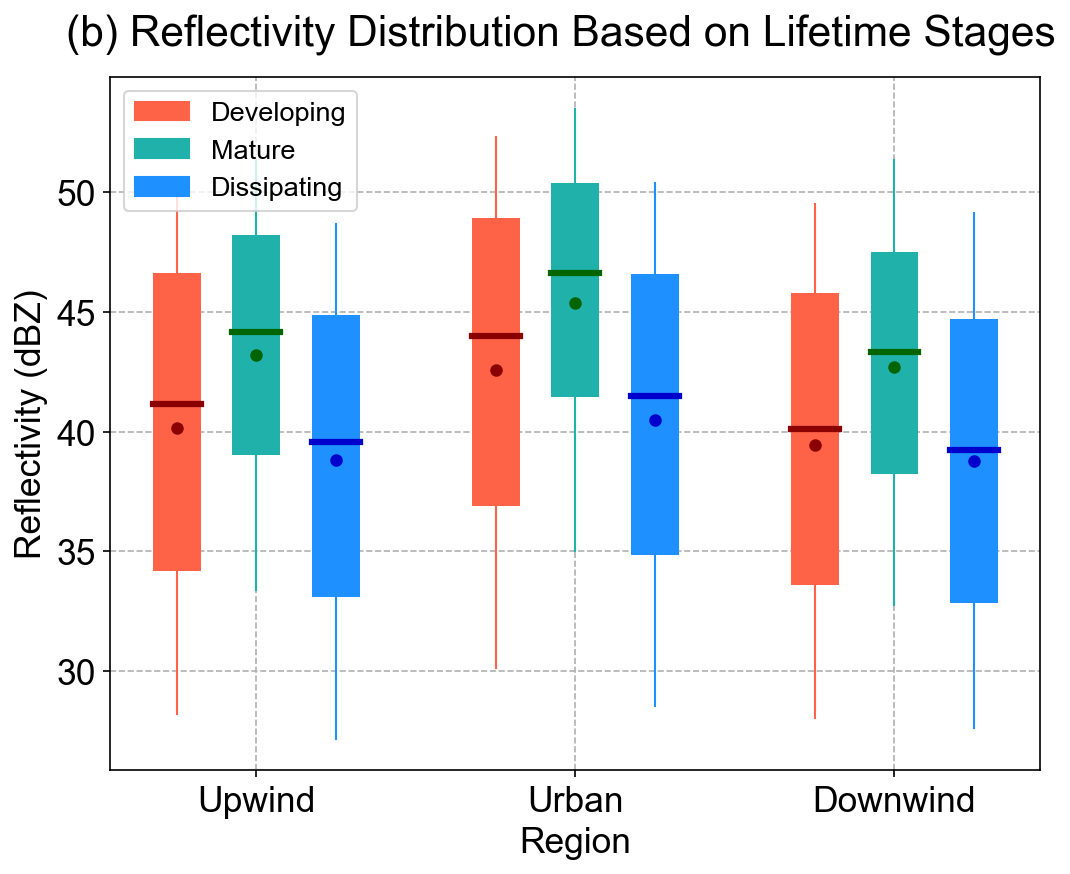

In [83]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

# Sample data (placeholders, replace with actual data)

# Setting up matplotlib parameters
mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.facecolor'] = 'white'

# Creating a single subplot layout
fig, ax = plt.subplots(figsize=[8, 6], dpi=150)

# Main title for the figure
fig.suptitle('(b) Reflectivity Distribution Based on Lifetime Stages', y=0.95)

# Plot settings
positions = [1, 2, 3, 5, 6, 7, 9, 10, 11]  # Position for each boxplot
widths = 0.6  # Width of each boxplot

# Colors for the subplots
subplot_colors = ['darkred', 'darkgreen', 'mediumblue']
box_whisker_colors = ['tomato', 'lightseagreen', 'dodgerblue']
subplot_labels = ['Developing', 'Mature', 'Dissipating']  # Labels for the legend

# Combining data for plotting
combined_data = [upwind_dbz_bin, urban_dbz_bin, downwind_dbz_bin]

# Creating legend patches
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(box_whisker_colors, subplot_labels)]

# Creating boxplots with lighter colors
for i, data_group in enumerate(combined_data):
    for j, data in enumerate(data_group):
        color = subplot_colors[j]
        colors = box_whisker_colors[j]
        boxprops_ = dict(linestyle='-', linewidth=0, color='k', facecolor=colors)  # Lighter color
        medianprops_ = dict(linestyle='-', linewidth=3, color=color)
        meanpointprops_ = dict(marker='o', markeredgecolor=color, markerfacecolor=color, markersize=5)
        whiskerprops_ = dict(linewidth=1, linestyle='-', color=colors)  # Lighter color

        ax.boxplot(data, positions=[positions[i * 3 + j]], patch_artist=True, widths=widths, notch=False, manage_ticks=False,
                   boxprops=boxprops_, medianprops=medianprops_, whiskerprops=whiskerprops_,
                   showfliers=False, showmeans=True, meanprops=meanpointprops_, whis=[10, 90], meanline=False, showcaps=False)

# Set labels and title
ax.set_ylabel('Reflectivity (dBZ)')
ax.set_xlabel('Region')
ax.set_xticks([2, 6, 10])
ax.set_xticklabels(['Upwind', 'Urban', 'Downwind'])
ax.grid(ls='--')

# Adding legend
ax.legend(handles=legend_patches, loc=2, fontsize=13)

plt.show()

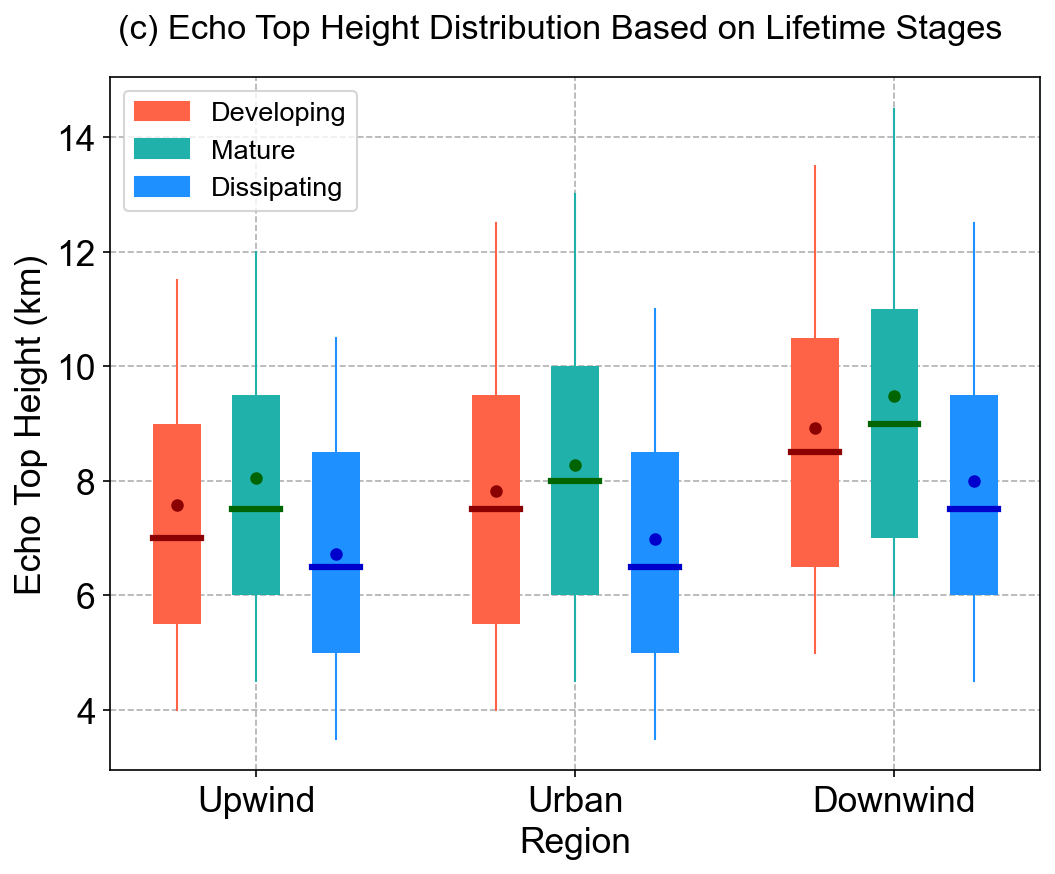

In [91]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

# Sample data (placeholders, replace with actual data)

# Setting up matplotlib parameters
mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.facecolor'] = 'white'

# Creating a single subplot layout
fig, ax = plt.subplots(figsize=[8, 6], dpi=150)

# Main title for the figure
fig.suptitle('(c) Echo Top Height Distribution Based on Lifetime Stages', fontsize=16.5, y=0.95)

# Plot settings
positions = [1, 2, 3, 5, 6, 7, 9, 10, 11]  # Position for each boxplot
widths = 0.6  # Width of each boxplot

# Colors for the subplots
subplot_colors = ['darkred', 'darkgreen', 'mediumblue']
box_whisker_colors = ['tomato', 'lightseagreen', 'dodgerblue']
subplot_labels = ['Developing', 'Mature', 'Dissipating']  # Labels for the legend

# Combining data for plotting
combined_data = [upwind_eth_bin, urban_eth_bin, downwind_eth_bin]

# Creating legend patches
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(box_whisker_colors, subplot_labels)]

# Creating boxplots with lighter colors
for i, data_group in enumerate(combined_data):
    for j, data in enumerate(data_group):
        color = subplot_colors[j]
        colors = box_whisker_colors[j]
        boxprops_ = dict(linestyle='-', linewidth=0, color='k', facecolor=colors)  # Lighter color
        medianprops_ = dict(linestyle='-', linewidth=3, color=color)
        meanpointprops_ = dict(marker='o', markeredgecolor=color, markerfacecolor=color, markersize=5)
        whiskerprops_ = dict(linewidth=1, linestyle='-', color=colors)  # Lighter color

        ax.boxplot(data, positions=[positions[i * 3 + j]], patch_artist=True, widths=widths, notch=False, manage_ticks=False,
                   boxprops=boxprops_, medianprops=medianprops_, whiskerprops=whiskerprops_,
                   showfliers=False, showmeans=True, meanprops=meanpointprops_, whis=[10, 90], meanline=False, showcaps=False)

# Set labels and title
ax.set_ylabel('Echo Top Height (km)')
ax.set_xlabel('Region')
ax.set_xticks([2, 6, 10])
ax.set_xticklabels(['Upwind', 'Urban', 'Downwind'])
ax.grid(ls='--')

# Adding legend
ax.legend(handles=legend_patches, loc=2, fontsize=13)

plt.show()